number found!
number end
53
27
320
309
number found!
number end
493
119
600
241
number found!
number end
795
51
812
305


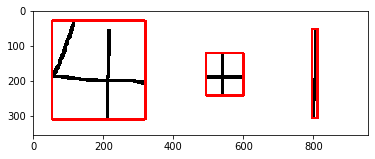

In [70]:
from matplotlib import pyplot as plt
from IPython.display import display
import cv2
import numpy as np

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

val = 100

img = cv2.imread('Screen Shot 2020-01-10 at 4.38.35 PM.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

low_threshold = val
detected_edges = cv2.Canny(gray, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = img * (mask[:,:,None].astype(img.dtype))

is_a_number = 0
is_in_middle = 0

top_r = 10000
bot_r = 0
prev_c = 0

height = img.shape[0]
width = img.shape[1]

np.savetxt('text.txt',detected_edges,fmt='%.2f')


for column in range(0, width):
    is_in_middle = 0
    for row in range(0, height):
        if (detected_edges[row, column] > 30):
            is_in_middle = 1
            if row > bot_r:
                bot_r = row
            if row < top_r:
                top_r = row
            

    if (is_in_middle == 1 and is_a_number == 0):
        print("number found!")
        is_a_number = 1       
        prev_c = column
        
    if is_in_middle == 0 and is_a_number == 1:
        print("number end")
        img = cv2.rectangle(img,(prev_c,top_r),(column, bot_r),(255,0,0),5)
        is_a_number = 0
        print(prev_c)
        print(top_r)
        print(column)
        print(bot_r)
        top_r, bot_r = 10000, 0
        
            
plt.imshow(img)
plt.show()